Alpha_Vantage Tutorial & Examples
=================================

Uses RomelTorres' API wrapper from Github.

TimeSeries
----------

Used to get price data over a time frame. Defaults to integer, though
pandas df is more useful. Extended or adjusted pricing data (adjusts
prices retroactively for splits & dividends).


In [1]:
import datetime
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

# initialize av API
AV_API_KEY = 'AIDD24S6AW4MOOHG'
ts = TimeSeries(key=AV_API_KEY, output_format='pandas')

TimeSeries defaults to returning 2 .json files: data & metadata, but
using `output_format='pandas'` returns as pandas df instead of .json.
`outputsize` kwarg defaults to `'compact'`, which returns last 100
values, but setting to `'full'` returns all available data rows (>1 MB
file sizes).

            1. open  2. high  3. low  4. close  5. adjusted close  6. volume  \
date                                                                           
2020-12-31    80.64    81.94   80.38     81.80          81.800000  5258719.0   
2020-12-30    81.66    81.73   80.54     80.59          80.590000  5661572.0   
2020-12-29    80.80    81.59   80.76     81.42          81.420000  5446607.0   
2020-12-28    80.65    81.14   80.13     80.45          80.450000  4542048.0   
2020-12-24    80.00    80.43   79.87     80.14          80.140000  2822033.0   
...             ...      ...     ...       ...                ...        ...   
1999-11-05    79.94    81.13   79.50     80.38          36.754245  3816200.0   
1999-11-04    79.56    80.69   79.06     79.69          36.438738  4144900.0   
1999-11-03    79.44    80.88   78.75     79.13          36.182675  4428900.0   
1999-11-02    79.56    80.19   78.00     78.06          35.693411  3186000.0   
1999-11-01    78.94    79.94   78.94    

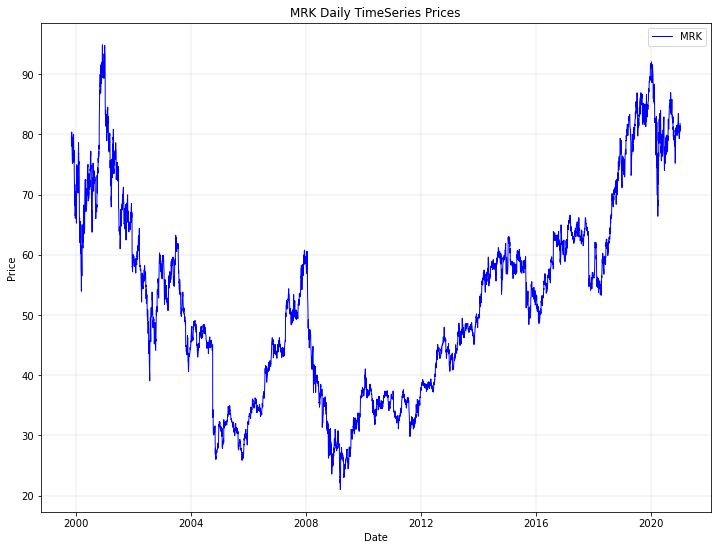

In [11]:
# create pandas df
data, metadata = ts.get_daily_adjusted('MRK', outputsize='full')
print(data)

# Plot daily closing prices.
merck_fig, merck_ax = plt.subplots(figsize=(12, 9))
merck_ax.plot(
    data.index,  # Series of x values
    data['4. close'],  # Series of f(x) values
    '-b',  # solid blue lines, no individual markers
    linewidth=1,
    label='MRK')  # label in legend
merck_ax.set_title('MRK Daily TimeSeries Prices')
merck_ax.set_xlabel('Date')
merck_ax.set_ylabel('Price')
merck_ax.grid(b=True, linestyle='-', linewidth=0.25)
merck_ax.legend()
